#  

<h1 style="text-align: center;" markdown="1">Proyecto Final: Integración de 3 o más cuerpos</h1>

#  
#  
- Carlos Daniel López Mimenza (**@SirSilverCharles**)
- Daniel Martínez Urrieta (**@danmarurr**)
- María Fernanda Pérez Ramírez (**@FernandaPerez**)

#  
1.	Introducción
2. Configuración Inicial
3.	Euler
4.	Runge-Kutta 4°
5.	Verlet
6. Comparación de Energía
7. Encontrando una solución estable para un sistema
8.	Cierre

#  


<h3 style="text-align: center;" markdown="1">I. Introducción</h3>

####   

\begin{align}
\vec{x}=\vec{x}_0+\vec{v}
\end{align}
\begin{align}
\vec{v}=\vec{v}_0+\vec{a}
\end{align}
<br/>
\begin{align}
\vec{a}=\frac{\vec{F}}{m}
\end{align}
<br/>
\begin{align}
\vec{F}=\sum_{}G\frac{m_1 m_2}{r^2}
\end{align}

<h3 style="text-align: center;" markdown="1">II. Configuración Inicial</h3>

Establecemos unos cuantos sistemas con los que probar los integradores.

In [1]:
# lista de planetas: posición x,y,x, velocidad x,y,z, masa
# Dos planetas órbitando una estrella
planetas = (
[0,0,0,-.03,0,0,2000],
[0,0,150,-4.1,0,0,10],
[150,0,0,0,4.1,0.0,3]
);

In [2]:
#órbita Circular perfecta
circulo = (
[0,0,0,-0.1,0,0,100],
[0,5,0,0.0,0,0,1]
)
circulo[2][4]=sqrt(circulo[1][7]/circulo[2][2])
circulo[1][4]=-sqrt(circulo[2][7]/circulo[2][2])/10;

In [3]:
#un planeta y su luna órbitando una estrella, obrita inestable que intentaremos arreglar
tres = (
[0,0,0,-0.001,0,0,2000],
[0,100,0,sqrt(2000/100)+.54,0,0,11],
[0,112,0,sqrt(2000/100)+.9,-.02,.82,1]
);

<h3 style="text-align: center;" markdown="1">III. Euler</h3>

Para comenzar probamos el integrador mas sencillo.

In [4]:
function moverEuler(planets1,steps=2000,h=1,resolucion=10000) #función principal que va a hacer los cálculos
    planets=deepcopy(planets1)
    
    
    # saveN es el numero de steps que guardara para hacer la grafica,
    # de modo que no tengas que guardar cada step porque gasta mucha memoria
    saveN=round(Int,steps/resolucion)+1
    iN=1
    
    # esto crea un array para cada planeta en la lista, es para guardar las posiciones en cada tiempo
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end

    for fr=1:steps #estos son los steps de tiempo para los cuales calcularemos la posición de cada planeta
        for i=1:length(planets)
            for ii=1:length(planets) #estos dos "for" se usaran para sacar la fuerza de cada planeta contra cada otro planeta
                if(i!=ii)#esto es para que un planeta no se cuente contra si mismo

                    #lo que sigue es obtener la fuerza de atracción: F=G*(m1*m2)/(r^2)

                    rx=planets[ii][1]-planets[i][1] #esta es la componente x del vector de la distancia entre un planeta y el otro
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz) #esto es al distancia al cuadrado: d=r^2=sqrt(rx^2+ry^2+rx^z)^2
                    r=sqrt(r2) #esto es la distancia: r
                    a=(planets[ii][7])/(r2) #esto es la fuerza ya multiplicada por la masa para sacar la aceleración: F=ma -> a=G*m2/(r^2)
                    
                    
                    #esta parte es para encontrar las componentes x,y,z de la aceleración,
                    # "a" es la magnitud y la dirección es igual a la del vector rx,ry,rz que teníamos
                    p=a/(r)
                    ax=p*rx
                    ay=p*ry
                    az=p*rz

                    planets[i][4]+=ax*h #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleracion a=cambio de velocida por unidad de tiempo 
                    planets[i][5]+=ay*h
                    planets[i][6]+=az*h
                end
            end

            planets[i][1]+=planets[i][4]*h #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleración a=cambio de velocidad por unidad de tiempo
            planets[i][2]+=planets[i][5]*h
            planets[i][3]+=planets[i][6]*h
        end
        if(fr==saveN*iN)
            iN+=1
            for i=1:length(planets)
                #x: la nueva posición es igual a la posición que tenia mas la velocidad por ejemplo v=metros/segundo, cuantos metros por unidad de tiempo
                push!(lista[i][1],planets[i][1])
                push!(lista[i][2],planets[i][2])
                push!(lista[i][3],planets[i][3])
            end
        end
    end
    lista
end;

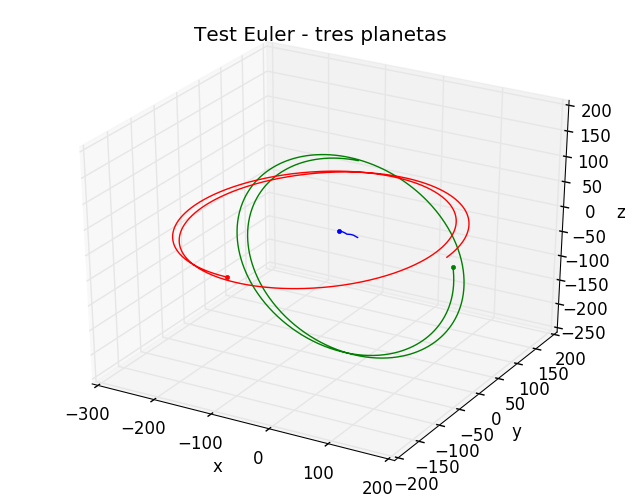

In [6]:
#Test Euler, primera prueba
lista=moverEuler(planetas,700)
using PyPlot
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Euler - tres planetas");

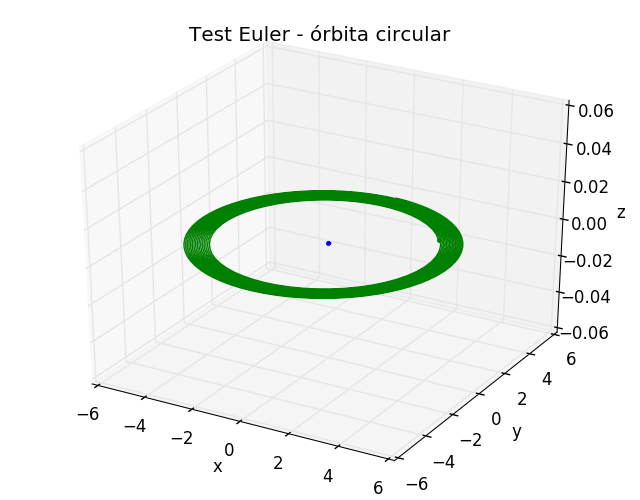

In [7]:
#órbita circular
lista=moverEuler(circulo,1000,.1)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Euler - órbita circular");

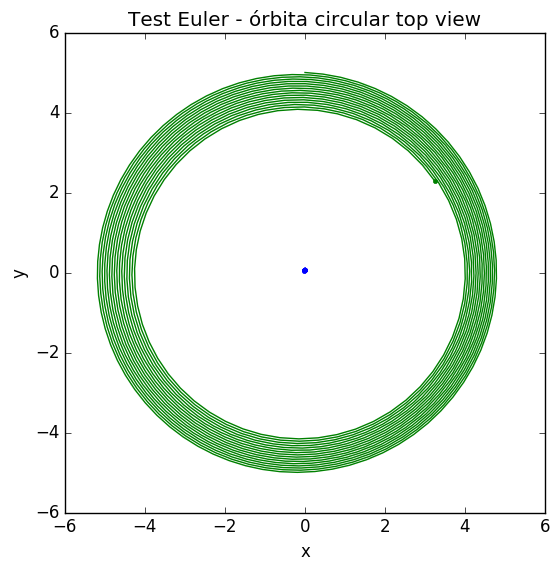

In [8]:
#Circular visto desde arriba
lista=moverEuler(circulo,1000,.1)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1])
end
axis("scaled")
xlabel("x")
ylabel("y")
title("Test Euler - órbita circular top view");

Podemos ver que hay un problema, va perdiendo energía

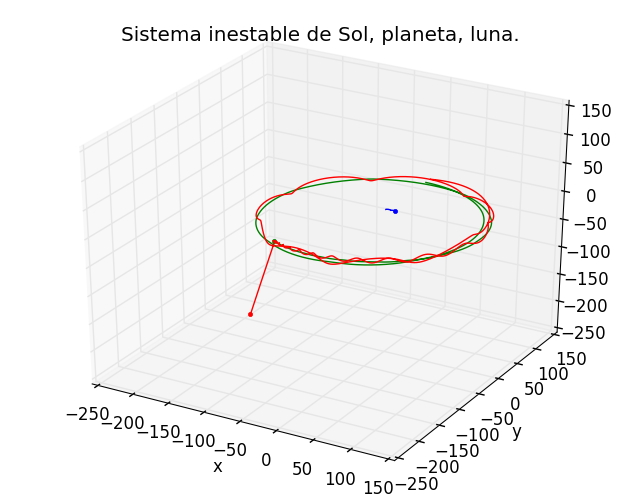

In [7]:
#sol, planeta y luna en obrita inestable
lista=moverEuler(tres,3900,.1)
using PyPlot
max=0
min=0
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
    
    for ii=1:3
        extrema(lista[i][ii])
        if(extrema(lista[i][ii])[1]<min)
            min=extrema(lista[i][ii])[1]
        end
        if(extrema(lista[i][ii])[2]>max)
            max=extrema(lista[i][ii])[2]
        end
    end
end
plot3D([min],[min],[min])
plot3D([max],[max],[max])
xlabel("x")
ylabel("y")
title("Sistema inestable de Sol, planeta, luna.");

Vemos que no es una óbrita estable

<h3 style="text-align: center;" markdown="1">IV. Runge-Kutta 4°</h3>

Para intentar resolver el problema de la perdida de energía veamos que sucede con una integración mas exacta.

In [9]:
#Integración Usando Runga Kutta 4
function moverRunge(planets1,steps=2000,h=1,resolucion=10000)
    planets=deepcopy(planets1)
 
    saveN=round(Int,steps/resolucion)+1
    iN=1
    

    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end

    #esto crea un array para guardar los 4 steps de Runge para cada planeta
    KvKr=Array(Array,4)
    KvKr[1]=Array(Array,0)
    KvKr[2]=Array(Array,0)
    KvKr[3]=Array(Array,0)
    KvKr[4]=Array(Array,0)
    for i=1:length(planets)
        for ii=1:4
            array=zeros(Number,6)
            push!(KvKr[ii],array)
        end
    end

    A=[0,h/2,h/2,h/1]


    for fr=1:steps
        for k=1:4
            for i=1:length(planets)
                for ii=1:length(planets)
                    if(i!=ii)
                        if(k>1)
                            rx=(planets[ii][1]+((A[k])*(KvKr[k-1][ii][1])))-(planets[i][1]+((A[k])*(KvKr[k-1][i][1])));
                            ry=(planets[ii][2]+((A[k])*(KvKr[k-1][ii][2])))-(planets[i][2]+((A[k])*(KvKr[k-1][i][2])));
                            rz=(planets[ii][3]+((A[k])*(KvKr[k-1][ii][3])))-(planets[i][3]+((A[k])*(KvKr[k-1][i][3])));
                        else
                            rx=planets[ii][1]-planets[i][1];
                            ry=planets[ii][2]-planets[i][2];
                            rz=planets[ii][3]-planets[i][3];
                        end


                        r2=(rx*rx)+(ry*ry)+(rz*rz);
                        r=sqrt(r2);
                        a=(planets[ii][7])/(r2);

                        ax=a*(rx/r);
                        ay=a*(ry/r);
                        az=a*(rz/r);

                        KvKr[k][i][4]+=ax;
                        KvKr[k][i][5]+=ay;
                        KvKr[k][i][6]+=az;
                    end
                end
                if(k>1)
                    KvKr[k][i][1]+=planets[i][4]+((A[k])*(KvKr[k-1][i][4]));
                    KvKr[k][i][2]+=planets[i][5]+((A[k])*(KvKr[k-1][i][5]));
                    KvKr[k][i][3]+=planets[i][6]+((A[k])*(KvKr[k-1][i][6]));
                else
                    KvKr[k][i][1]+=planets[i][4];
                    KvKr[k][i][2]+=planets[i][5];
                    KvKr[k][i][3]+=planets[i][6];
                end
            end
        end


        for i=1:length(planets)


        planets[i][1]+=((h/6)*(KvKr[1][i][1]+2*KvKr[2][i][1]+2*KvKr[3][i][1]+KvKr[4][i][1]));
        planets[i][2]+=((h/6)*(KvKr[1][i][2]+2*KvKr[2][i][2]+2*KvKr[3][i][2]+KvKr[4][i][2]));
        planets[i][3]+=((h/6)*(KvKr[1][i][3]+2*KvKr[2][i][3]+2*KvKr[3][i][3]+KvKr[4][i][3]));

        planets[i][4]+=((h/6)*(KvKr[1][i][4]+2*KvKr[2][i][4]+2*KvKr[3][i][4]+KvKr[4][i][4]));
        planets[i][5]+=((h/6)*(KvKr[1][i][5]+2*KvKr[2][i][5]+2*KvKr[3][i][5]+KvKr[4][i][5]));
        planets[i][6]+=((h/6)*(KvKr[1][i][6]+2*KvKr[2][i][6]+2*KvKr[3][i][6]+KvKr[4][i][6]));
        end

        if(fr==saveN*iN)
            iN+=1
            for i=1:length(planets)
                push!(lista[i][1],planets[i][1])
                push!(lista[i][2],planets[i][2])
                push!(lista[i][3],planets[i][3])
            end
        end
        for i=1:4
            for ii=1:length(planets)
                for iii=1:6
                    KvKr[i][ii][iii]=0;
                end
            end
        end
            
    end
lista
end;

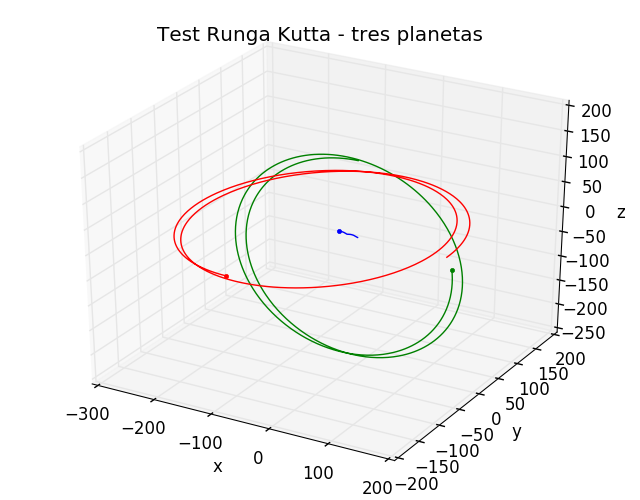

In [9]:
#Test Runge
lista=moverRunge(planetas,700)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Runga Kutta - tres planetas");

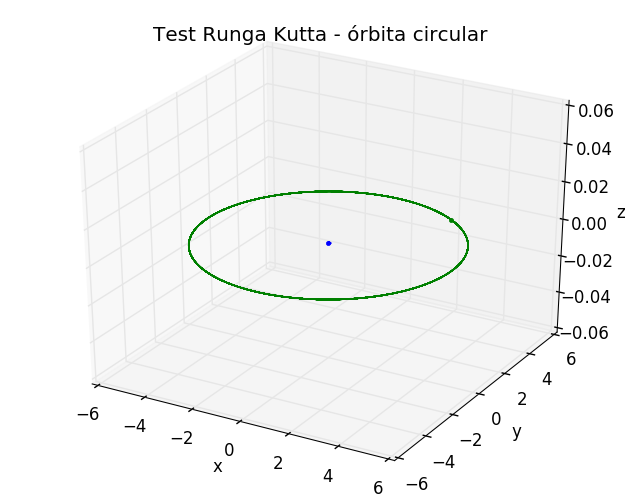

In [10]:
#órbita circular
lista=moverRunge(circulo,1000,.1)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Runga Kutta - órbita circular");

Esta funciona mucho mejor que la anterior

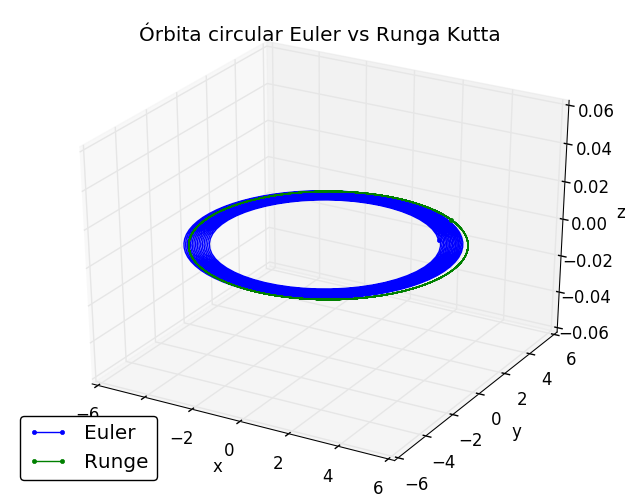

In [11]:
#órbita circular Euler vs Kutta

lista=moverEuler(circulo,1000,.1)
plot3D(lista[2][1],lista[2][2],lista[2][3],marker=".",markevery=[length(lista[2][1])-1],label="Euler")

lista=moverRunge(circulo,1000,.1)
plot3D(lista[2][1],lista[2][2],lista[2][3],marker=".",markevery=[length(lista[2][1])-1],label="Runge")


legend(loc="lower left",fancybox="true")
xlabel("x")
ylabel("y")
zlabel("z")
title("Órbita circular Euler vs Runga Kutta");

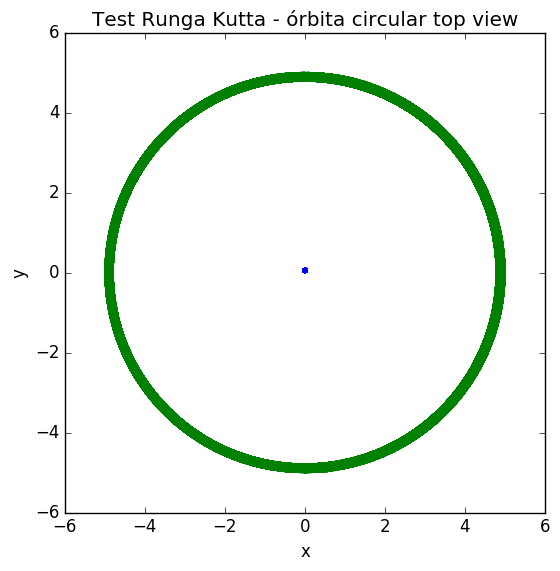

In [12]:
# Mucho tiempo
lista=moverRunge(circulo,500000,.1,50000*2)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1])
end
axis("scaled")
xlabel("x")
ylabel("y")
title("Test Runga Kutta - órbita circular top view");

Sin embargo eventualmente también da problemas.

<h3 style="text-align: center;" markdown="1">V. Verlet</h3>

Ahora probemos un método diseñado para conservar energía.

In [13]:
#Verlet Velocity integración con energía estable
function moverVerletV(planets1,steps=2000,h=1,resolucion=10000) 
    planets=deepcopy(planets1)
    
    for i=1:length(planets)
        push!(planets[i],0)
        push!(planets[i],0)
        push!(planets[i],0)
    end
    
    saveN=round(Int,steps/resolucion)+1
    iN=1
    
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end
    
    #Verlet usa posición en lugar de velocidad así que hay que calcular el primer step con otro método
    for i=1:length(planets)
        axt=0
        ayt=0
        azt=0
        for ii=1:length(planets)
            if(i!=ii)

                rx=planets[ii][1]-planets[i][1] 
                ry=planets[ii][2]-planets[i][2]
                rz=planets[ii][3]-planets[i][3]

                r2=(rx*rx)+(ry*ry)+(rz*rz)
                r=sqrt(r2) 
                a=(planets[ii][7])/(r2)

                p=a/(r)
                ax=p*rx
                ay=p*ry
                az=p*rz

                axt+=ax 
                ayt+=ay
                azt+=az
            end
        end
        
        planets[i][8]=axt
        planets[i][9]=ayt
        planets[i][10]=azt
        
        planets[i][4]+=axt*(h)
        planets[i][5]+=ayt*(h)
        planets[i][6]+=azt*(h)

        planets[i][1]+=planets[i][4]*(h)
        planets[i][2]+=planets[i][5]*(h)
        planets[i][3]+=planets[i][6]*(h)
        
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])        
    end
    

    for fr=1:steps 
        for i=1:length(planets)
            planets[i][1]+=planets[i][4]*h+.5*planets[i][8]*h*h
            planets[i][2]+=planets[i][5]*h+.5*planets[i][9]*h*h
            planets[i][3]+=planets[i][6]*h+.5*planets[i][10]*h*h
        end
        for i=1:length(planets)
            axt=0
            ayt=0
            azt=0
            for ii=1:length(planets)
                if(i!=ii)

                    rx=planets[ii][1]-planets[i][1] 
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz) 
                    r=sqrt(r2)
                    a=(planets[ii][7])/(r2)
                    
                    p=a/(r)
                    ax=p*rx
                    ay=p*ry
                    az=p*rz

                    axt+=ax 
                    ayt+=ay
                    azt+=az
                end
            end
            axp=planets[i][8]
            ayp=planets[i][9]
            azp=planets[i][10]

            planets[i][8]=axt
            planets[i][9]=ayt
            planets[i][10]=azt

            planets[i][4]+=.5*(axp+axt)*h
            planets[i][5]+=.5*(ayp+ayt)*h
            planets[i][6]+=.5*(azp+azt)*h
        end
        if(fr==saveN*iN)
            iN+=1
            for i=1:length(planets)
                push!(lista[i][1],planets[i][1])
                push!(lista[i][2],planets[i][2])
                push!(lista[i][3],planets[i][3])
            end
        end
    end
    lista
end;

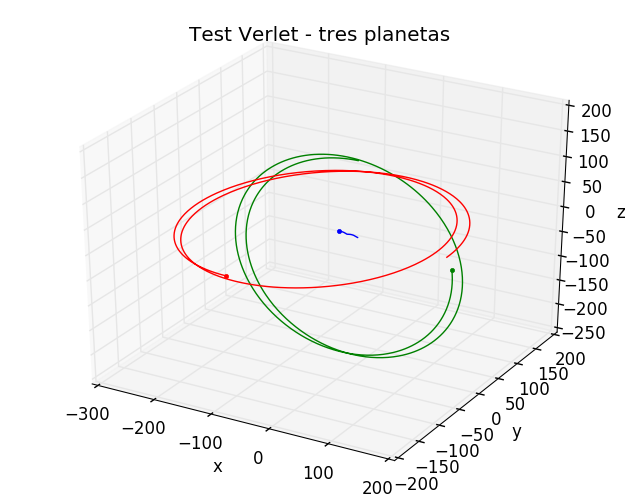

In [12]:
#La probamos, parece estar en orden
lista=moverRunge(planetas,700)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Verlet - tres planetas");

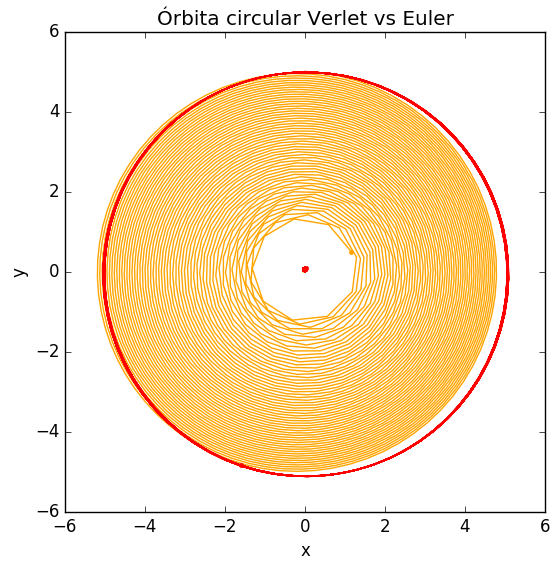

In [16]:
lista=moverEuler(circulo,2200,.1)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1],color="orange")
end
axis("scaled")

lista=moverVerletV(circulo,2200,.1)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1],color="red")
end
axis("scaled")
xlabel("x")
ylabel("y")
title("Órbita circular Verlet vs Euler");

<h3 style="text-align: center;" markdown="1">VI. Comparación de Energía</h3>

Veamos que la energía en Verlet es estable

In [17]:
#Medidor de  Energía
ps=circulo
steps=500
h=.1
lista=moverEuler(ps,steps,h,steps*2)
function energy(ps,steps,h,lble="-")
    EP=Array(Number,0)
    EC=Array(Number,0)
    E=Array(Number,0)
    R=Array(Number,0)
    E0=0
    for t=3:steps
        ep=0
        ec=0
        for i=1:length(lista)
            rx=lista[i][1][t-1]-lista[i][1][t]
            ry=lista[i][2][t-1]-lista[i][2][t]
            rz=lista[i][3][t-1]-lista[i][3][t]

            r=sqrt((rx*rx)+(ry*ry)+(rz*rz))
            v=r/h


            ec+=(1/2)*ps[i][7]*v*v

            for ii=i+1:length(lista)
                rx=lista[ii][1][t]-lista[i][1][t]
                ry=lista[ii][2][t]-lista[i][2][t]
                rz=lista[ii][3][t]-lista[i][3][t]

                r2=(rx*rx)+(ry*ry)+(rz*rz)
                r=sqrt(r2)

                ep-=ps[i][7]*ps[ii][7]/r
            end
        end
        if(t==3)
            E0=ep+ec
        end
        push!(EP,ep)
        push!(EC,ec)
        push!(E,E0/(ep+ec))
    end
    plot(1:steps-2,E,label=lble)
end;

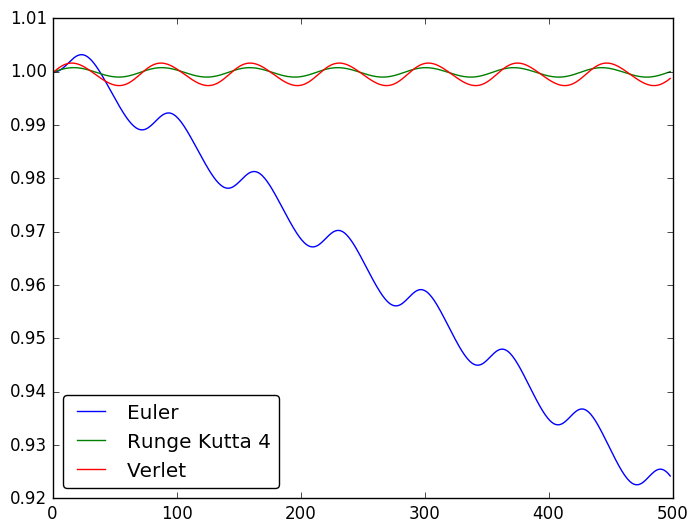

In [15]:
ps=circulo
steps=500
h=.1
lista=moverEuler(ps,steps,h,steps*2)
energy(ps,steps,h,"Euler")
lista=moverRunge(ps,steps,h,steps*2)
energy(ps,steps,h,"Runge Kutta 4")
lista=moverVerletV(ps,steps,h,steps*2)
energy(ps,steps,h,"Verlet")
legend(loc="lower left",fancybox="true");

Podemos ver como la energía de Euler va cayendo, mientras que la de Runge y Verlet oscilan

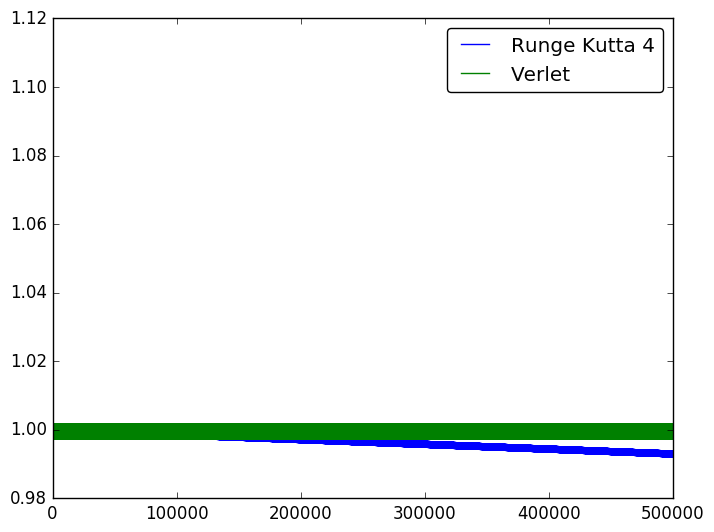

In [18]:
ps=circulo
steps=500000
h=.1
lista=moverRunge(ps,steps,h,steps*2)
energy(ps,steps,h,"Runge Kutta 4")
lista=moverVerletV(ps,steps,h,steps*2)
energy(ps,steps,h,"Verlet")
legend(loc="uper left",fancybox="true")
plot([0],[1.1]);

Si lo corremos un largo tiempo vemos que Runge también va cayendo pero Verlet es estable

<h3 style="text-align: center;" markdown="1">VII. Encontrando una solución estable para un sistema</h3>

Queremos encontrar cuales condiciones iniciales para un sistema de un sol, un planeta, y una luna órbitando ese planeta producen un sistema estable, procederemos de la siguiente manera
1.	simulamos el sistema con las condiciones actuales y vemos en que tiempo falla(2)
2.	para determinar en que tiempo falla medimos la distancia entre los cuerpos que están en obrita: sol-planeta y planeta-luna. Si la distancia pasa cierto limite(3) podemos saber que el sistema es inestable
3.	la distancia máxima se determina en base a la distancia de los dos cuerpos durante las condiciones iniciales, y multiplicada por algún factor de modo que un poco de variación sea permitida
4.	al detectar que el sistema falla se detiene la simulación
5.	modificamos las condiciones iniciales (posición y velocidad) en una cantidad pequeña y aleatoria.
6.	simulamos el nuevo sistema y medimos el tiempo en el que falla
7.	si el tiempo que el nuevo sistema sobrevivió es mayor que el tiempo del anterior sistema entonces usamos estas nuevas condiciones iniciales, si es menor las descartamos y continuamos con las anteriores
8.	repetimos el proceso hasta encontrar una solución que sea estable por el tiempo deseado

In [16]:
#Test de estabilidad--- esta es una función que modifica la posición y velocidad de un planeta en un sistema para encontrar un sistema mas estable
function estable(planets1,steps=2000,h=1,p1=3,p2=2,maxiterations=3,range=2) 
    planets=deepcopy(planets1)
    
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end
    
    for i=1:length(planets)
        ix=planets[i][1]
        iy=planets[i][2]
        iz=planets[i][3]
        planets[i][1]+=planets[i][4]*h
        planets[i][2]+=planets[i][5]*h
        planets[i][3]+=planets[i][6]*h
        planets[i][4]=ix
        planets[i][5]=iy
        planets[i][6]=iz
    end
    
    maxtime=0
    x0=sqrt((planets[p1][1]^2)+(planets[p1][2]^2)+(planets[p1][3]^2))
    d0=sqrt(((planets[p2][1]-planets[p1][1])^2)+((planets[p2][2]-planets[p1][2])^2)+((planets[p2][3]-planets[p1][3])^2))
    x1=0
    d1=0
    print("Current\n\tcenter distance: ",x0,"\tplanet distance: ",d0,"\n")
    print("Limit\n\tcenter distance: ",x0*range,"\tplanet distance: ",d0*range,"\n\n")
    
    px=0
    py=0
    pz=0
    pvx=0
    pvy=0
    pvz=0
    nx=0
    ny=0
    nz=0
    nvx=0
    nvy=0
    nvz=0
    
    rrr=100
    function ran()
        if(rand()<.5)
            rand()*10
        else
            -rand()*10
        end
    end    

    
    success=true
    fr=0
    iterations=0
    while fr<steps 
        fr+=1
        for i=1:length(planets)
            axt=0;
            ayt=0;
            azt=0;
            for ii=1:length(planets)
                if(i!=ii)


                    rx=planets[ii][1]-planets[i][1]
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz)
                    r=sqrt(r2) 
                    a=(planets[ii][7])/(r2) 
                    
                    p=a/(r)
                    ax=p*rx
                    ay=p*ry
                    az=p*rz

                    axt+=ax 
                    ayt+=ay
                    azt+=az
                end
            end
            xp=planets[i][4]
            yp=planets[i][5]
            zp=planets[i][6]
            
            planets[i][4]=planets[i][1]
            planets[i][5]=planets[i][2]
            planets[i][6]=planets[i][3]
    
            planets[i][1]=axt*h*h+2*planets[i][1]-xp
            planets[i][2]=ayt*h*h+2*planets[i][2]-yp
            planets[i][3]=azt*h*h+2*planets[i][3]-zp
        end
        
        x1=sqrt((planets[p1][1]^2)+(planets[p1][2]^2)+(planets[p1][3]^2))
        d1=sqrt(((planets[p2][1]-planets[p1][1])^2)+((planets[p2][2]-planets[p1][2])^2)+((planets[p2][3]-planets[p1][3])^2))
        if(x1>x0*range || d1>d0*(range)) 
            iterations+=1
            #reset planets
            planets=deepcopy(planets1)
            

            
            if(fr>maxtime)
                maxtime=fr
                ptime=maxtime
                px=nx
                py=ny
                pz=nz
                pvx=nvx
                pvy=nvy
                pvz=nvz
                print("Current: ",iterations,"\n")
                print(px," ",py," ",pz,"\n")
                print(pvx," ",pvy," ",pvz,"\n")
            end
            
            nx=px+(ran()/rrr)
            ny=py+(ran()/rrr)
            nz=pz+(ran()/rrr)
            nvx=pvx+(ran()/rrr)
            nvy=pvy+(ran()/rrr)
            nvz=pvz+(ran()/rrr)
            
            
            planets[p1][1]+=nx
            planets[p1][2]+=ny
            planets[p1][3]+=nz
            planets[p1][4]+=nvx
            planets[p1][5]+=nvy
            planets[p1][6]+=nvz
            
            
            #velocidad vs pocision en verlen
            for i=1:length(planets)
                ix=planets[i][1]
                iy=planets[i][2]
                iz=planets[i][3]
                planets[i][1]+=planets[i][4]*h
                planets[i][2]+=planets[i][5]*h
                planets[i][3]+=planets[i][6]*h
                planets[i][4]=ix
                planets[i][5]=iy
                planets[i][6]=iz
            end
                    
            #reset frame and add iteration
            if(iterations>maxiterations)
                success=false
                fr=steps
            else
                fr=0
            end
            
            
        end
    end
    lista
    print("\nFinal: ",iterations,"\n")
    
    print("[")
    print(planets1[p1][1]+px,",")
    print(planets1[p1][2]+py,",")
    print(planets1[p1][3]+pz,",")
    print(planets1[p1][4]+pvx,",")
    print(planets1[p1][5]+pvy,",")
    print(planets1[p1][6]+pvz,",")
    print(planets1[p1][7])
    print("]")
    if(success)
        print("\n\n\nSuccess: stable for ",steps,"steps.\n\n")
    else
        print("\n\n\nProgram stopped before finding a stable solution.\n\n")
    end
    
    print("Final distance: ",d1)
end;

In [28]:
#veamos de nuevo nuestro sistema de tres planetas órbitando
tres = (
[0,0,0,-0.001,0,0,2000],
[0,100,0,sqrt(2000/100)+.54,0,0,11],
[0,112,0,sqrt(2000/100)+.9,-.02,.82,1]
);

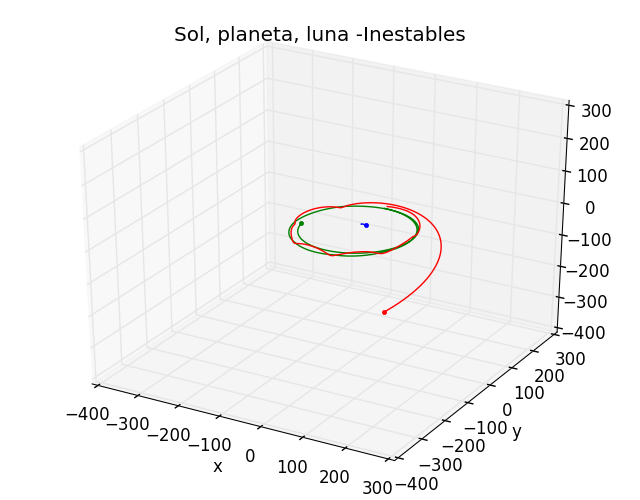

In [20]:
#grafica de tres planetas orbitándose
lista=moverVerletV(tres,3900,.1)
using PyPlot
max=0
min=0
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
    
    for ii=1:3
        extrema(lista[i][ii])
        if(extrema(lista[i][ii])[1]<min)
            min=extrema(lista[i][ii])[1]
        end
        if(extrema(lista[i][ii])[2]>max)
            max=extrema(lista[i][ii])[2]
        end
    end
end
plot3D([min],[min],[min])
plot3D([max],[max],[max])
xlabel("x")
ylabel("y")
title("Sol, planeta, luna -Inestables");

vemos que la órbita no es estable, ahora probemos la función que busca una órbita mas estable

In [29]:
#busca una órbita que sea estable durante 10000 steps, y hace 300 iteraciones, modificando solamente la tercera partícula
estable(tres,10000,.1,3,2,300,2);

Current
	center distance: 111.99931841956536	planet distance: 11.998334217715394
Limit
	center distance: 223.9986368391307	planet distance: 23.996668435430788

Current: 1
0 0 0
0 0 0
Current: 5
-0.02539190860305318 0.07539436738526714 -0.09150225054811767
-0.09638501548258592 0.06390508547075723 0.01606542377499054
Current: 9
-0.0819772538429592 0.030532056540215326 -0.17131474508081754
-0.009758684720389307 0.008476604630127726 0.04821036017657596
Current: 19
-0.07244276668602163 0.01799397061199234 -0.15959893997453958
0.07567201847046165 0.020848880591454698 -0.020537322343824348

Final: 53
[-0.07244276668602163,112.017993970612,-0.15959893997453958,5.4478079734700415,0.0008488805914546975,0.7994626776561756,1.0]


Success: stable for 10000steps.

Final distance: 2.727962161071525

In [30]:
#al final nos da las coordenadas modificadas de la tercera partícula
tres = (
[0,0,0,-0.001,0,0,2000],
[0,100,0,sqrt(2000/100)+.54,0,0,11],
[-0.07244276668602163,112.017993970612,-0.15959893997453958,5.4478079734700415,0.0008488805914546975,0.7994626776561756,1.0]
);

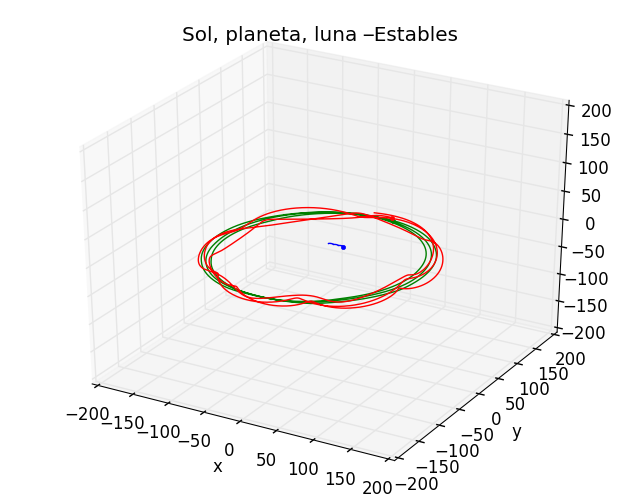

In [31]:
#grafica
lista=moverVerletV(tres,7000,.1)
using PyPlot
max=0
min=0
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
    
    for ii=1:3
        extrema(lista[i][ii])
        if(extrema(lista[i][ii])[1]<min)
            min=extrema(lista[i][ii])[1]
        end
        if(extrema(lista[i][ii])[2]>max)
            max=extrema(lista[i][ii])[2]
        end
    end
end
plot3D([min],[min],[min])
plot3D([max],[max],[max])
xlabel("x")
ylabel("y")
title("Sol, planeta, luna –Estables");

Vemos que ahora el sistema es estable a un tiempo mayor

<h3 style="text-align: center;" markdown="1">VII. Cierre</h3>

Simulación de los planetas interiores del sistema solar.

In [775]:
# y para terminar vamos a simular los planetas interiores del sistema solar
SistemaSolar=(
[5.628055933511824E+05,3.411843693775460E+05,-2.436386981035113E+04,
    -7.291599363100120E-04,1.210708994860029E-02,-1.869664697214633E-06,
    1.3271244004193938e+11,"Sol"
],
[-5.114900970348819E+07,-4.060852024612986E+07,1.373753734754255E+06,
    2.027956942186843E+01,-3.600051303471849E+01,-4.803191913645168E+00,
    22032.09,"Mercury"
],
[9.854679342419721E+07,4.646197811407988E+07,-5.046280202213528E+06,
    -1.502715063408101E+01,3.154566133521156E+01,1.299473506881935E+00,
    324858.63,"Venus"
],
[-1.048872226277378E+08,-1.076353288430656E+08,-1.961730794146657E+04,
    2.083297782408464E+01,-2.092328512963567E+01,1.528554128359616E-03,
    398600.440,"Earth"
],
[-1.045914151109089E+08,-1.074351546688744E+08,-4.175107901339978E+04,
    2.021104671033281E+01,-2.001895526099204E+01,-6.854614438420903E-02,
    4902.798,"Moon"    
],
[-1.381194575492661E+08,-1.841909714269926E+08,-4.877476766278595E+05,
    2.027889587634121E+01,-1.246818497418936E+01,-7.592524395983373E-01,
    42828.3,"Mars"
    ]
);

Los datos se obtuvieron en http://ssd.jpl.nasa.gov/horizons.cgi

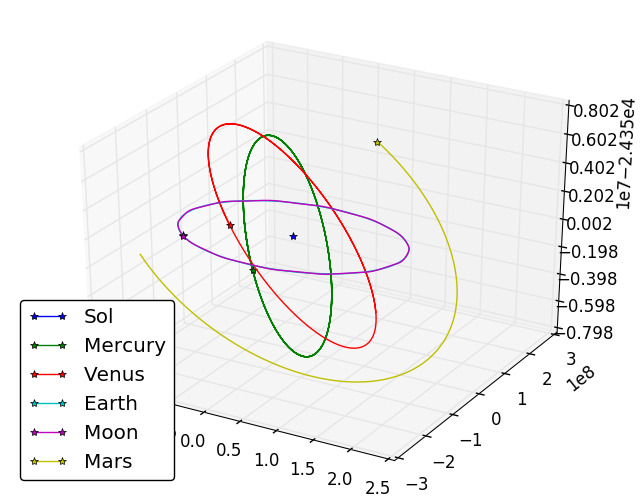

PyObject <matplotlib.legend.Legend object at 0x000000003C100BA8>

In [779]:
# ta dah! aunque la dirección de las velocidades esta mal
lista=moverVerletV(SistemaSolar,360*24*60*60,1)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],label=SistemaSolar[i][8],marker="*",markevery=[length(lista[i][1])-1])
end
legend(loc="lower left",fancybox="true");